In [221]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [222]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. Identify the columns with missing data from the given dataset.

In [223]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

2. Perform type conversions for required numeric columns

In [224]:
df.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education_num     object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [225]:
for column in ['age', 'fnlwgt', 'education_num']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [226]:
df.isna().sum()

age                48
workclass           0
fnlwgt            107
education           0
education_num      57
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [227]:
imputer = SimpleImputer(strategy='median')
df[['age', 'fnlwgt', 'education_num']] = pd.DataFrame(imputer.fit_transform(df[['age', 'fnlwgt', 'education_num']]), columns=[['age', 'fnlwgt', 'education_num']])

In [228]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [229]:
df['age'] = df['age'].astype(int)
df['fnlwgt'] = df['fnlwgt'].astype(int)
df['education_num'] = df['education_num'].astype(int)

df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

3. Perform One-Hot Encoding, Ordinal Encoding and Label Encoding on the required columns

In [230]:
df.nunique()

age                 68
workclass            8
fnlwgt            4506
education           17
education_num       16
marital_status       7
occupation          15
relationship         6
race                 6
sex                  3
capital_gain        83
capital_loss        55
hours_per_week      74
native_country      40
income               2
dtype: int64

In [231]:
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,Bachelors,13,4,Adm-clerical,1,5,2,2174,0,40,United-States,0
1,50,5,83311,Bachelors,13,2,Exec-managerial,0,5,2,0,0,13,United-States,0
2,38,3,215646,HS-grad,9,0,Handlers-cleaners,1,5,2,0,0,40,United-States,0
3,53,3,234721,11th,7,2,Handlers-cleaners,0,3,0,0,0,40,United-States,0
4,28,3,338409,Bachelors,13,2,Prof-specialty,5,3,1,0,0,40,Cuba,0


4. Analyze the data and perform imputation using the best-fitted technique (mean, median, mode and KNN (k=5)) for the given column

5. Identify the outliers from the given columns using statistical methods (IQR, z-score)

In [232]:
highest = df['age'].mean() + 3*df['age'].std()
lowest = df['age'].mean() - 3*df['age'].std()
print("\nOutliers of age:")
print(df[(df['age'] > highest) | (df['age'] < lowest)]['age'])


Outliers of age:
222     90
430     80
918     81
1040    90
1168    88
1935    90
2303    90
2754    80
2891    90
2906    81
3211    82
3537    81
3777    80
4070    90
4109    90
4834    81
Name: age, dtype: int64


In [233]:
p25 = df['fnlwgt'].quantile(0.25)
p75 = df['fnlwgt'].quantile(0.75)
iqr = p75 - p25
upper = p75 + 1.5 * iqr
lower = p25 - 1.5 * iqr
print("\nOutliers of ", 'fnlwgt', ":")
print(df[(df['fnlwgt'] > upper) | (df['fnlwgt'] < lower)]['fnlwgt'])


Outliers of  fnlwgt :
37      544091
40      507875
80      446839
110     432376
157     494223
         ...  
4729    628797
4823    424988
4918    443508
4973    632613
4979    499249
Name: fnlwgt, Length: 144, dtype: int64


6. Explore sklearn’s module for outlier detection (eg. LOF, OneClassSVM)

In [234]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.005)
df['gain-lof'] = lof.fit_predict(df[['capital_gain']])
print("\nOutliers of capital_gain: ")
print(df[df['gain-lof']==-1]['capital_gain'])


Outliers of capital_gain: 
271     1055
436      594
484      594
613     1055
656     1111
738      594
789     1055
1433     594
1452    1055
1592    1055
1691    1055
2214    1055
2347     594
2543     914
2746     594
3572    1055
3605    1055
3645    1055
3815     594
4073     914
4109     991
4114    1055
4288    1086
4909     914
Name: capital_gain, dtype: int64


c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [235]:
ifor = IsolationForest(contamination=0.005, random_state=42)
df['hours-lof'] = ifor.fit_predict(df[['hours_per_week']])
print("\nOutliers of capital_loss: ")
print(df[df['hours-lof']==-1]['hours_per_week'])


Outliers of capital_loss: 
272     98
935     99
1172    99
1417    90
1730    90
1824    84
1887    99
2333    90
2429    84
2761    84
2920    98
2963    85
3092    84
3343    84
3578    99
3909    84
4086    99
4091    84
4294    85
4308    99
4348    84
4441    99
4736    84
4778    84
4862    90
Name: hours_per_week, dtype: int64


In [236]:
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
df['loss_svm'] = ocsvm.fit_predict(df[['capital_loss']])
df['loss_svm'].value_counts()

loss_svm
-1    4901
 1      99
Name: count, dtype: int64

In [237]:
df[df['loss_svm']==-1].hours_per_week

0       40
1       13
2       40
3       40
4       40
        ..
4995    40
4996    40
4997    40
4998    60
4999    55
Name: hours_per_week, Length: 4901, dtype: int64

7. Identify the categorical and numeric columns in the dataset

In [238]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'gain-lof', 'hours-lof', 'loss_svm'],
      dtype='object')

In [239]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['education', 'occupation', 'native_country'], dtype='object')

In [240]:
df = df.drop(['gain-lof', 'hours-lof', 'loss_svm'], axis=1)

8. Perform scaling using (Min-max Scaler/StandardScaler) on the required columns

In [241]:
to_scale = ['age','fnlwgt','capital_gain','capital_loss','hours_per_week']
num = ['age','fnlwgt','capital_gain','capital_loss','hours_per_week', 'income']

In [242]:
mmscaler = MinMaxScaler()
df[to_scale] = mmscaler.fit_transform(df[to_scale])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,6,0.057415,Bachelors,13,4,Adm-clerical,1,5,2,0.02174,0.0,0.397959,United-States,0
1,0.452055,5,0.063130,Bachelors,13,2,Exec-managerial,0,5,2,0.00000,0.0,0.122449,United-States,0
2,0.287671,3,0.193648,HS-grad,9,0,Handlers-cleaners,1,5,2,0.00000,0.0,0.397959,United-States,0
3,0.493151,3,0.212462,11th,7,2,Handlers-cleaners,0,3,0,0.00000,0.0,0.397959,United-States,0
4,0.150685,3,0.314726,Bachelors,13,2,Prof-specialty,5,3,1,0.00000,0.0,0.397959,Cuba,0


9. Perform feature selection to identify the columns relevant for the target column.(Filter Method/Wrapper Method) 

In [243]:
df_num = df[num]

In [244]:
corr_matrix = df_num[num].corr()
corr = corr_matrix['income'].abs().sort_values(ascending=False)
print(corr)

income            1.000000
hours_per_week    0.241162
age               0.231230
capital_gain      0.218064
capital_loss      0.159681
fnlwgt            0.023577
Name: income, dtype: float64


In [245]:
rfc = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=rfc, n_features_to_select=3)

rfe.fit(df_num.drop('income', axis=1), df_num['income'])
selected_features = df_num.drop('income', axis=1).columns[rfe.support_]

print("Selected features by RFE:", selected_features)

Selected features by RFE: Index(['age', 'fnlwgt', 'capital_gain'], dtype='object')


10. Identify and perform feature extraction by creating new columns from the existing columns for dimensionality reduction.

11. Perform dimensionality reduction using PCA and t-SNE. Compare the features obtained from both methods

In [247]:
x = df_num.drop('income',axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca1)

           PC1       PC2
0     0.005464 -0.039562
1     0.134032 -0.104410
2    -0.017122 -0.034150
3     0.182132 -0.075883
4    -0.158445 -0.004240
...        ...       ...
4995  0.049235 -0.048046
4996 -0.113408 -0.013863
4997  0.103368 -0.059420
4998 -0.019421 -0.005253
4999  0.269928 -0.073441

[5000 rows x 2 columns]


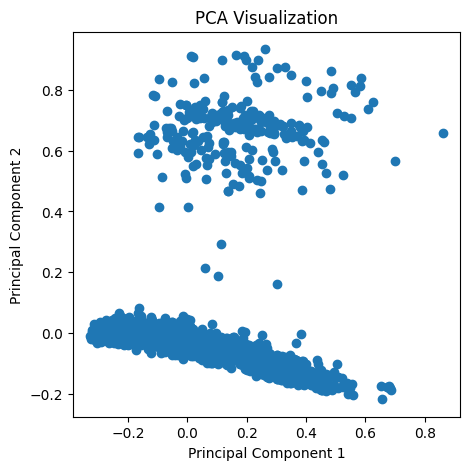

In [248]:
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [249]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(x)

df_tsne1 = pd.DataFrame(X_tsne, columns=['Component1', 'Component2'])
print(df_tsne1)

      Component1  Component2
0       2.354582  -46.846573
1     -19.433084  -47.841999
2     -13.003875  -11.329354
3      31.722651  -15.337911
4     -20.933199   31.910168
...          ...         ...
4995    8.345714  -15.065137
4996  -21.453236    9.896984
4997   20.020420  -21.066528
4998   27.124928   40.963623
4999   47.276894   17.313343

[5000 rows x 2 columns]


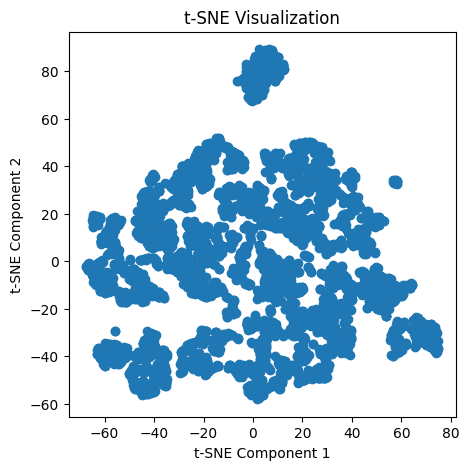

In [250]:
plt.figure(figsize=(5, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

12. Analyze the distribution of the target labels in the dataset.
 - Perform sampling to obtain an evenly distributed dataset.

In [251]:
df['income'].value_counts()

income
0    3779
1    1221
Name: count, dtype: int64

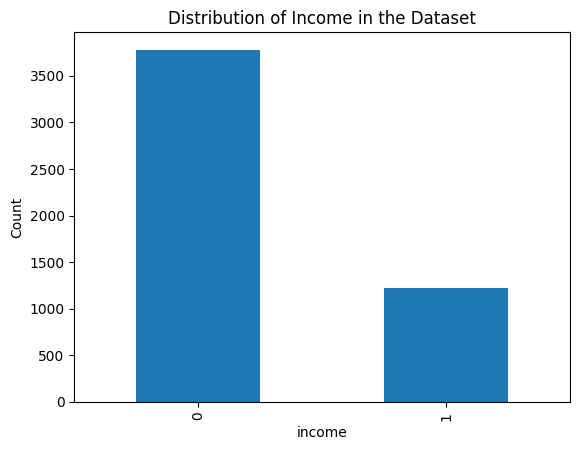

In [252]:
df['income'].value_counts().plot(kind='bar')
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Distribution of Income in the Dataset')
plt.show()

In [253]:
X = df.drop(columns=['income'])
y = df['income']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

income
0    3779
1    3779
Name: count, dtype: int64


In [254]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

income
0    1221
1    1221
Name: count, dtype: int64


In [256]:
X = df_num.drop(columns=['income'])
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

income
0    3488
1    3488
Name: count, dtype: int64
